# ENGR-E 221 Intelligent Systems I Fall 2020

## Lab 6 Clustering with Support Vector Machines (SVC)

Thursday Lab: 10/01/2020 3:15 pm - 4:30 pm

Friday Lab: 10/02/2020 9:25 am - 10:40 am

<!--bibtex

@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

@book{pythonbook,
 author = {VanderPlas, Jake},
 title = {Python Data Science Handbook: Essential Tools for Working with Data},
 year = {2016},
 isbn = {1491912057, 9781491912058},
 edition = {1st},
 publisher = {O'Reilly Media, Inc.},
}

-->

### Outline

1) Introduction -- syntax blobs and the basic SVC commands

2) Built in SVM function for classification

3) Rrovide def for plotting decision boundaries

4) Exploring hyper-planes (linear)

5) Build a SVM classifier 

6) Introduce the rbf kernel

## Introduction  (15 minutes) 

This weeks lab we will be having fun with support vector machines. Lets start by creating data with blobs. 

```python
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=100, centers=2, cluster_std=2.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool');
```

What happens when you change the standard deviation of the clusters (cluster_std)?. What are the variables X and y, do we need them both?

```python
print(X), print(y) 
```

We can now create synthetic data sets, or are at least well on our way to creating them using the make_blobs function. Lets try and build a classifier using SVM to see if we can successfully classify our data-set into two classes. Why two?  

```python
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
```

What is C? What happens if we change it? 


The following was recreated from [CITE](#scikit-learn) and [CITE](#pythonbook) and will be used to visualize our decision boundaries.


```python
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
```

Lets take a look at our data we created with make\_blobs with the decision boundaries included.

```python
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(model); 
```

How do we know if our model is properly fit (.fit\_status\_)? Take some time to explore the documentation below and learn some of the capabilities of SVC. 

Lets take a look at the scikit learn manual page for SVC: [SVC Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)



Now that we know how to build a classifier with SVM using a data-set we created lets try and make predictions about new data. 

```python
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,)
model = SVC(kernel='linear')
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)
```

In [5]:
# intro

from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.75, random_state=0)

#print(X), print(y) #This is for instruction purposes

from sklearn.svm import SVC 
model = SVC(kernel='linear', C=0.1)
model.fit(X, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# decision function plot


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

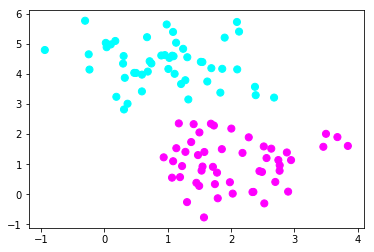

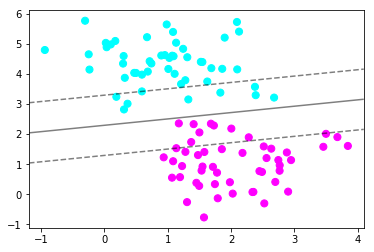

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool');
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(model); 
plt.show()

## Task 1: Generate data and build a model (15 minutes).

Use the blobs function and create a data-set with three centers, build a classifier and test it out (15 minutes).  
 

Show me your class labels from the prediction, how did we do?



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0 -2  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0  0]


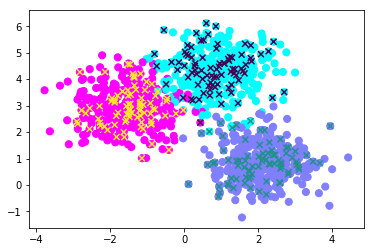

In [12]:
# task 1
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# first lets take a look and the make_blobs function

X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.75, random_state=0)    
plt.scatter(X[:, 0], X[:, 1], marker ='o', c=y, s=50, cmap='cool');

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

from sklearn.svm import SVC# "Support vector classifier"
model = SVC(kernel='linear')
model.fit(Xtrain,ytrain)

pred = model.predict(Xtest)
score = pred - ytest
print(score)

plt.scatter(Xtest[:,0],Xtest[:,1],marker='x', c=pred)
#plot_svc_decision_function(model)
#merp = [Xtest,ytest,pred]
#merp
#score

## Task 2: Non-linear Seperable Data (15 minutes)

What happens when we cannot draw lines through our data?

We can use kernels, here we introduce the rbf kernel.


First lets make a data-set that we cannot draw a line through. 

```python
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
```

What kind of real world data could may look similar to this? 

```python
rbf_model = SVC(kernel='rbf', C=1E6)
rbf_model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(rbf_model)
plt.scatter(rbf_model.support_vectors_[:, 0], rbf_model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
```

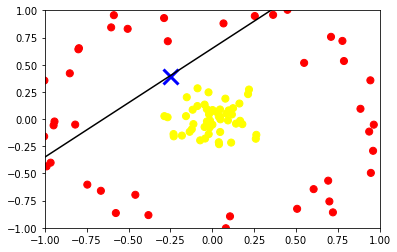

In [21]:
# Task 2 examples
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([-0.25], [0.4], 'x', color='blue', markeredgewidth=3, markersize=15)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 1);
plt.ylim(-1, 1);
plt.show()
#clearly we need a non linear method!


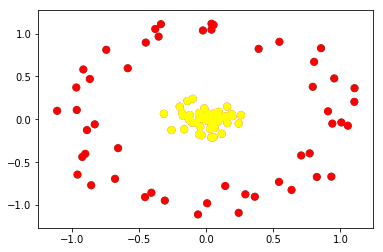

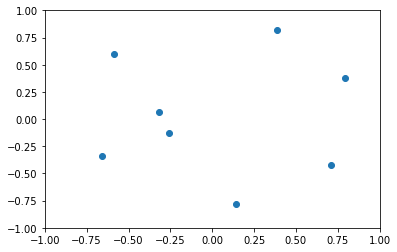

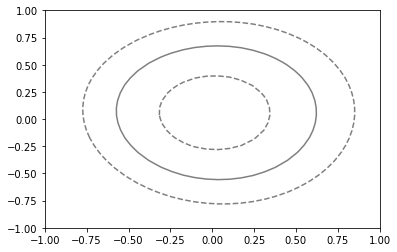

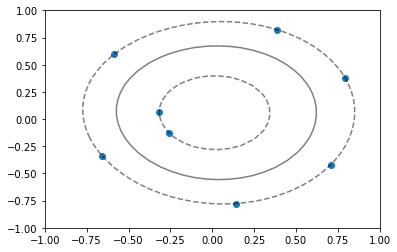

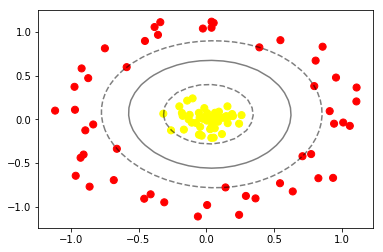

In [27]:
# Task 2
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')

rbf_model = SVC(kernel='rbf', C=1E6)
rbf_model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

plt.xlim(-1, 1);
plt.ylim(-1, 1);
plt.scatter(rbf_model.support_vectors_[:, 0], rbf_model.support_vectors_[:, 1]);
plt.show()

plt.xlim(-1, 1);
plt.ylim(-1, 1);
plot_svc_decision_function(rbf_model)
plt.show()


plt.xlim(-1, 1);
plt.ylim(-1, 1);
plt.scatter(rbf_model.support_vectors_[:, 0], rbf_model.support_vectors_[:, 1]);
plot_svc_decision_function(rbf_model)
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(rbf_model) # this turns the boundries on and off
plt.show()

### Task 3: Split data, train a classifier and make predictions (10 minutes)

Show me your class labels for the prediction, how did we do?

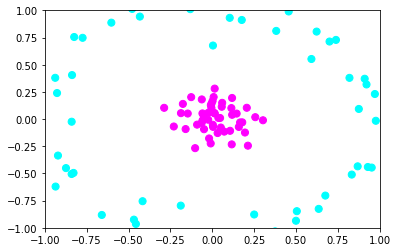

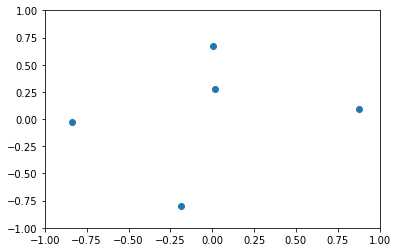

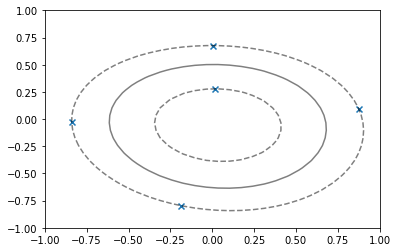

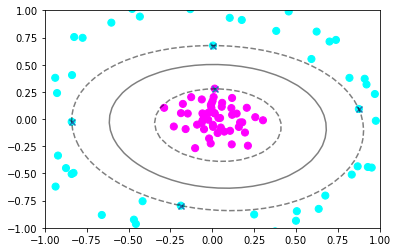

In [30]:
from sklearn.datasets.samples_generator import make_circles

# make some non linear data

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

# instantiate the model

clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1]);
plt.show()

plt.xlim(-1,1)
plt.ylim(-1,1)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='x');
plt.show()

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='x');
plt.show()
